In [ ]:
import sys

!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

!pip uninstall scikit-learn -y
!pip install -U scikit-learn
!pip install scikeras
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=bfc5d3e56a9e9845cd06afcadeea01b0b02a75ba6bafe64309d51a4e40

In [ ]:
from typing import List
import matplotlib.pyplot as plt

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import random
from matplotlib import pyplot
from matplotlib.colors import ListedColormap

import os, shutil
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight, compute_sample_weight
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    LeaveOneOut,
    cross_val_score,
    train_test_split,
)

import requests

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp "/content/drive/My Drive/Spaceship Titanic/kaggle.json" ~/.kaggle/
!pip install kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                     Apple Quality                                      170KB  2024-01-11 14:31:07           4818        119  1.0              
hummaamqaasim/jobs-in-data                                         Jobs and Salaries in Data Science                   76KB  2023-12-25 20:03:32          11399        217  1.0              
juledz/heart-attack-prediction                                     Heart Attack Prediction                              8KB  2024-01-19 16:11:46           1455         38  1.0              
joebeachcapital/57651-spotify-songs               

In [ ]:
DATA_PATH = "/content/drive/MyDrive/Spaceship Titanic/Dati/"
IMAGE_PATH = "/content/drive/MyDrive/Spaceship Titanic/Immagini/Tecniche di ML/"
OUTPUT_PATH = "kaggle_submissions/"

In [ ]:
dataset_13 = pd.read_csv(DATA_PATH + "train_13.csv")
train_13, y_train_13 = dataset_13.drop(columns=['Unnamed: 0','Transported']), dataset_13.Transported
train_13

,gggg,Deck,Cabin_num,Side,HomePlanet,Destination,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,0,0,1,0,0,39.0,0.0,0.0,0.0,0.0,0.0
1,2,5,0,1,0,0,0,24.0,109.0,9.0,25.0,549.0,44.0
2,3,0,0,1,1,0,0,58.0,43.0,3576.0,0.0,6715.0,49.0
3,3,0,0,1,1,0,0,33.0,0.0,1283.0,371.0,3329.0,193.0
4,4,5,1,1,0,0,0,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,0,98,0,1,1,0,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,9278,6,1499,1,0,2,1,18.0,0.0,0.0,0.0,0.0,0.0
8690,9279,6,1500,1,0,0,0,26.0,0.0,0.0,1872.0,1.0,0.0
8691,9280,4,608,1,1,1,0,32.0,0.0,1049.0,0.0,353.0,3235.0


In [ ]:
dataset_22 = pd.read_csv(DATA_PATH + "train_22.csv")
train_22, y_train_22 = dataset_22.drop(columns=['Unnamed: 0','Transported']), dataset_22.Transported
train_22

,gggg,Deck_B,Deck_C,Deck_E,Deck_F,Deck_G,Cabin_num,Side_P,Side_S,HomePlanet_Earth,...,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,0,0,0,0,0,1,0,0,...,0,0,1,0,39.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,1,0,0,0,1,1,...,0,0,1,0,24.0,109.0,9.0,25.0,549.0,44.0
2,3,0,0,0,0,0,0,0,1,0,...,0,0,1,0,58.0,43.0,3576.0,0.0,6715.0,49.0
3,3,0,0,0,0,0,0,0,1,0,...,0,0,1,0,33.0,0.0,1283.0,371.0,3329.0,193.0
4,4,0,0,0,1,0,1,0,1,1,...,0,0,1,0,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,0,0,0,0,0,98,1,0,0,...,1,0,0,0,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,9278,0,0,0,0,1,1499,0,1,1,...,0,1,0,1,18.0,0.0,0.0,0.0,0.0,0.0
8690,9279,0,0,0,0,1,1500,0,1,1,...,0,0,1,0,26.0,0.0,0.0,1872.0,1.0,0.0
8691,9280,0,0,1,0,0,608,0,1,0,...,1,0,0,0,32.0,0.0,1049.0,0.0,353.0,3235.0


DECISION TREE CLASSIFIER

Setting max_depth migliore

In [ ]:
def set_depth(train, test):
  columns = ['Depth', 'Score']
  depth_score = pd.DataFrame(columns=columns)
  depths = np.linspace(3, 15, 13, dtype=int)

  for d in depths:
    tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    scores = cross_val_score(tree, train, test, cv=10)
    row = pd.DataFrame(data=[[d, scores.mean()]], columns=columns)
    depth_score = pd.concat([depth_score, row])

  return depth_score

In [ ]:
depth_score_13 = set_depth(train_13, y_train_13)
depth_score_13

,Depth,Score
0,3,0.718744
0,4,0.749118
0,5,0.755557
0,6,0.755442
0,7,0.756939
0,8,0.751993
0,9,0.745207
0,10,0.738762
0,11,0.725877
0,12,0.724953


In [ ]:
depth_score_22 = set_depth(train_22, y_train_22)
depth_score_22

,Depth,Score
0,3,0.713225
0,4,0.748430
0,5,0.758895
0,6,0.758436
0,7,0.753949
0,8,0.746816
0,9,0.740605
0,10,0.734620
0,11,0.723575
0,12,0.722078


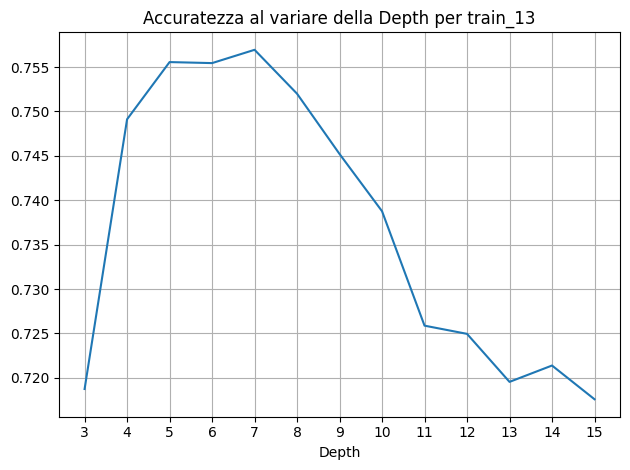

In [ ]:
fig, ax = plt.subplots()
ax.plot(depth_score_13.Depth, depth_score_13.Score)
ax.set(xlabel='Depth', ylabel='Score', title="Accuratezza al variare della Depth per train_13")
ax.set_ylabel("")
ax.set_xticks(np.linspace(3,15,13,dtype=int))
ax.grid()
plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "RF_Depth_13.png")):
  plt.savefig(IMAGE_PATH + "RF_Depth_13.png", format="png")
plt.show()

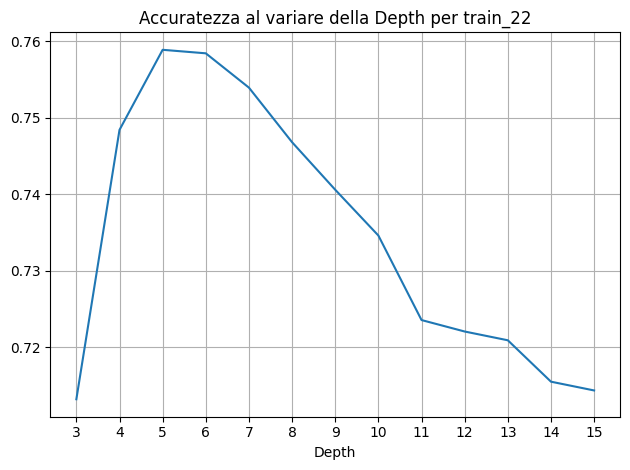

In [ ]:
fig, ax = plt.subplots()
ax.plot(depth_score_22.Depth, depth_score_22.Score)
ax.set(xlabel='Depth', ylabel='Score', title="Accuratezza al variare della Depth per train_22")
ax.set_ylabel("")
ax.set_xticks(np.linspace(3,15,13,dtype=int))
ax.grid()
plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "RF_Depth_22.png")):
  plt.savefig(IMAGE_PATH + "RF_Depth_22.png", format="png")
plt.show()

Range max_depth migliore: 4-8

Setting min_samples_split migliore

In [ ]:
def set_min_samples_split(train, test):
  columns = ['Min_Samples_Split', 'Score']
  splits_score = pd.DataFrame(columns=columns)
  splits = np.linspace(10, 30, 21, dtype=int)

  for s in splits:
    tree = DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=s)
    scores = cross_val_score(tree, train, test, cv=10)
    row = pd.DataFrame(data=[[s, scores.mean()]], columns=columns)
    splits_score = pd.concat([splits_score, row])

  return splits_score

In [ ]:
splits_score_13 = set_min_samples_split(train_13, y_train_13)
splits_score_13

,Min_Samples_Split,Score
0,10,0.755444
0,11,0.755329
0,12,0.755329
0,13,0.755329
0,14,0.755329
0,15,0.755329
0,16,0.755214
0,17,0.755214
0,18,0.755674
0,19,0.755674


In [ ]:
splits_score_22 = set_min_samples_split(train_22, y_train_22)
splits_score_22

,Min_Samples_Split,Score
0,10,0.757630
0,11,0.757630
0,12,0.757630
0,13,0.757630
0,14,0.757745
0,15,0.757745
0,16,0.757745
0,17,0.757745
0,18,0.758435
0,19,0.758435


Parametro poco influente, comunque range min_samples_split migliore: 18-24

Setting min_samples_leaf

In [ ]:
def set_min_samples_leaf(train, test):
  columns = ['Min_Samples_Leaf', 'Score']
  leafs_score = pd.DataFrame(columns=columns)
  leafs = np.linspace(5, 15, 10, dtype=int)

  for l in leafs:
    tree = DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=20, min_samples_leaf=l)
    scores = cross_val_score(tree, train, test, cv=10)
    row = pd.DataFrame(data=[[l, scores.mean()]], columns=columns)
    leafs_score = pd.concat([leafs_score, row])

  return leafs_score

In [ ]:
leafs_score_13 = set_min_samples_leaf(train_13, y_train_13)
leafs_score_13

,Min_Samples_Leaf,Score
0,5,0.755444
0,6,0.755444
0,7,0.756249
0,8,0.756364
0,9,0.756249
0,10,0.756364
0,11,0.756710
0,12,0.756825
0,13,0.756364
0,15,0.755329


In [ ]:
leafs_score_22 = set_min_samples_leaf(train_22, y_train_22)
leafs_score_22

,Min_Samples_Leaf,Score
0,5,0.758550
0,6,0.758435
0,7,0.758896
0,8,0.758896
0,9,0.758666
0,10,0.758666
0,11,0.758666
0,12,0.758781
0,13,0.758436
0,15,0.757630


Range min_samples_leaf migliore: 7-12

Setting max_features

In [ ]:
def set_max_features(train, test, max):
  columns = ['Max_Features', 'Score']
  features_score = pd.DataFrame(columns=columns)
  features = np.linspace(1, max, max, dtype=int)

  for f in features:
    tree = DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=20, min_samples_leaf=12, max_features=f)
    scores = cross_val_score(tree, train, test, cv=10)
    row = pd.DataFrame(data=[[f, scores.mean()]], columns=columns)
    features_score = pd.concat([features_score, row])

  return features_score

In [ ]:
features_score_13 = set_max_features(train_13, y_train_13, 13)
features_score_13

,Max_Features,Score
0,1,0.715863
0,2,0.714604
0,3,0.740716
0,4,0.747388
0,5,0.775226
0,6,0.750259
0,7,0.775800
0,8,0.761884
0,9,0.753260
0,10,0.750960


In [ ]:
features_score_22 = set_max_features(train_22, y_train_22, 22)
features_score_22

,Max_Features,Score
0,1,0.689182
0,2,0.701145
0,3,0.731744
0,4,0.713674
0,5,0.736694
0,6,0.760383
0,7,0.741061
0,8,0.717251
0,9,0.722429
0,10,0.764872


Numero di max_features migliore per train_13: 5, 7

Numero di max_features migliore per train_22: 6, 10, 15

Setting cpp_alpha, pruning parameter

In [ ]:
def set_ccp_alpha(train, test, f):
  columns = ['Ccp_Alpha', 'Score']
  ccp_alpha_score = pd.DataFrame(columns=columns)
  alpha_values = [0, 0.00001, 0.0001, 0.001, 0.01]

  for a in alpha_values:
    tree = DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=20, min_samples_leaf=12, max_features=f, ccp_alpha=a)
    scores = cross_val_score(tree, train, test, cv=10)
    row = pd.DataFrame(data=[[a, scores.mean()]], columns=columns)
    ccp_alpha_score = pd.concat([ccp_alpha_score, row])

  return ccp_alpha_score

In [ ]:
ccp_alpha_score_13 = set_ccp_alpha(train_13, y_train_13, 7)
ccp_alpha_score_13

,Ccp_Alpha,Score
0,0,0.775800
0,0.00001,0.775800
0,0.0001,0.775800
0,0.001,0.774995
0,0.01,0.732084


In [ ]:
ccp_alpha_score_22 = set_ccp_alpha(train_22, y_train_22, 10)
ccp_alpha_score_22

,Ccp_Alpha,Score
0,0,0.764872
0,0.00001,0.764872
0,0.0001,0.764872
0,0.001,0.764642
0,0.01,0.767751


In [ ]:
dtc_13 = DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=20, min_samples_leaf=12, max_features=7)
scores = cross_val_score(dtc_13, train_13, y_train_13, cv=10)
print("Accuratezza per ogni singolo sottoinsieme di training 13 con Decision Tree: ")
print(scores)
print("\nAccuratezza media di training 13 con Decision Tree: ")
print(scores.mean())
dtc_13.fit(train_13, y_train_13)

Accuratezza per ogni singolo sottoinsieme di training 13 con Decision Tree: 
[0.77471264 0.75402299 0.76896552 0.7698504  0.75719217 0.78020713
 0.78826237 0.78826237 0.80552359 0.76409666]

Accuratezza media di training 13 con Decision Tree: 
0.7751095855984551


DecisionTreeClassifier(max_depth=5, max_features=7, min_samples_leaf=12,
                       min_samples_split=20, random_state=42)

In [ ]:
dtc_22 = DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=20, min_samples_leaf=12, max_features=10, ccp_alpha=0.01)
scores = cross_val_score(dtc_22, train_22, y_train_22, cv=10)
print("Accuratezza per ogni singolo sottoinsieme di training 22 con Decision Tree: ")
print(scores)
print("\nAccuratezza media 22 con Decision Tree: ")
print(scores.mean())
dtc_22.fit(train_22, y_train_22)

Accuratezza per ogni singolo sottoinsieme di training 22 con Decision Tree: 
[0.75517241 0.74022989 0.74942529 0.76064442 0.73993096 0.80437284
 0.79746835 0.78481013 0.77905639 0.76639816]

Accuratezza media 22 con Decision Tree: 
0.7677508829014721


DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, max_features=10,
                       min_samples_leaf=12, min_samples_split=20,
                       random_state=42)

RANDOM FORESTS

Setting n_estimators

In [ ]:
def set_n_estimators(train, test, f):
  columns = ['N_Estimators', 'Score']
  estimators_score = pd.DataFrame(columns=columns)
  estimators = np.linspace(50, 500, 10, dtype=int)

  for e in estimators:
    tree = RandomForestClassifier(n_estimators=e, max_depth=5, random_state=42, min_samples_split=20, min_samples_leaf=12, max_features=f)
    scores = cross_val_score(tree, train, test, cv=10)
    row = pd.DataFrame(data=[[e, scores.mean()]], columns=columns)
    estimators_score = pd.concat([estimators_score, row])

  return estimators_score

In [ ]:
estimators_score_13 = set_n_estimators(train_13, y_train_13, 7)
estimators_score_13

,N_Estimators,Score
0,50,0.776151
0,100,0.774308
0,150,0.777070
0,200,0.776610
0,250,0.775229
0,300,0.775345
0,350,0.774654
0,400,0.774540
0,450,0.775575
0,500,0.774655


In [ ]:
estimators_score_22 = set_n_estimators(train_22, y_train_22, 10)
estimators_score_22

,N_Estimators,Score
0,50,0.787651
0,100,0.786616
0,150,0.788456
0,200,0.787996
0,250,0.788341
0,300,0.787191
0,350,0.787651
0,400,0.788915
0,450,0.788915
0,500,0.788340


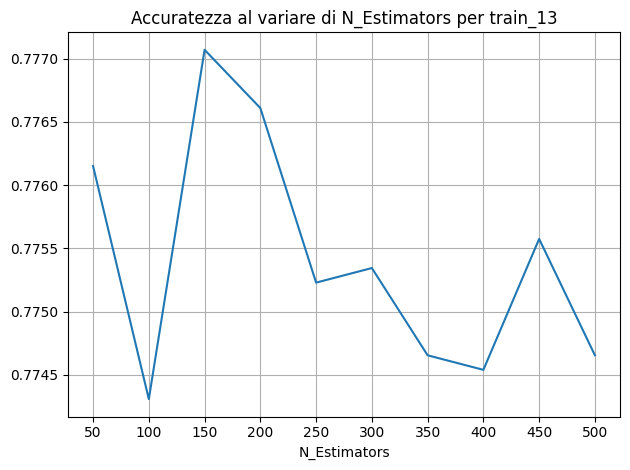

In [ ]:
fig, ax = plt.subplots()
ax.plot(estimators_score_13.N_Estimators, estimators_score_13.Score)
ax.set(xlabel='N_Estimators', ylabel='Score', title="Accuratezza al variare di N_Estimators per train_13")
ax.set_ylabel("")
ax.set_xticks(np.linspace(50, 500, 10, dtype=int))
ax.grid()
plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "RF_Estimators_13.png")):
  plt.savefig(IMAGE_PATH + "RF_Estimators_13.png", format="png")
plt.show()

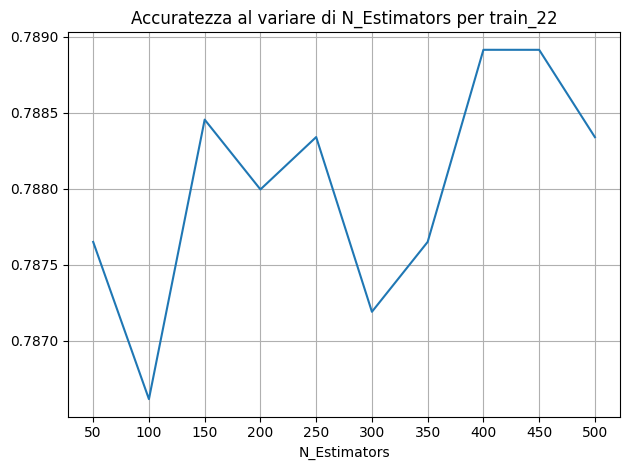

In [ ]:
fig, ax = plt.subplots()
ax.plot(estimators_score_22.N_Estimators, estimators_score_22.Score)
ax.set(xlabel='N_Estimators', ylabel='Score', title="Accuratezza al variare di N_Estimators per train_22")
ax.set_ylabel("")
ax.set_xticks(np.linspace(50, 500, 10, dtype=int))
ax.grid()
plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "RF_Estimators_22.png")):
  plt.savefig(IMAGE_PATH + "RF_Estimators_22.png", format="png")
plt.show()

Setting max_samples

In [ ]:
def set_max_sample(train, test, samples:np.ndarray, e, f, l):
  columns = ['Max_Sample', 'Score']
  max_sample_score = pd.DataFrame(columns=columns)

  for s in samples:
    tree = RandomForestClassifier(n_estimators=e, max_samples=s, max_depth=5, random_state=42, min_samples_split=20, min_samples_leaf=l, max_features=f)
    scores = cross_val_score(tree, train, test, cv=10)
    row = pd.DataFrame(data=[[s, scores.mean()]], columns=columns)
    max_sample_score = pd.concat([max_sample_score, row])

  return max_sample_score

In [ ]:
samples = [650, 700, 750, 800, 850, 900, 1000, 2000, 3000]
max_sample_score_13 = set_max_sample(train_13, y_train_13, samples, 150, 7, 12)
max_sample_score_13

,Max_Sample,Score
0,650,0.788224
0,700,0.790986
0,750,0.789374
0,800,0.789260
0,850,0.788569
0,900,0.788110
0,1000,0.786156
0,2000,0.785813
0,3000,0.784893


In [ ]:
samples = [1000, 1200, 1400, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 2000, 3000]
max_sample_score_22 = set_max_sample(train_22, y_train_22, samples, 450, 10, 8)
max_sample_score_22

,Max_Sample,Score
0,1000,0.788800
0,1200,0.790065
0,1400,0.790525
0,1500,0.790410
0,1550,0.791560
0,1600,0.791330
0,1650,0.791905
0,1700,0.790985
0,1750,0.790410
0,1800,0.791215


Addestramento per determinare la miglior configurazione possibile di Random Forest sia per train_13 che per train_22

In [ ]:
#ADDESTRAMENTO train_13

rfc_13 = RandomForestClassifier(min_samples_leaf=12, min_samples_split=20, random_state=42, ccp_alpha=0)
parameter_grid_13 = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': [5, 7],
    'max_samples': [700, 750],
    'warm_start': [True, False]
}

cross_validation_13 = StratifiedKFold(n_splits=10)
cross_validation_13.get_n_splits(train_13, y_train_13)

# Create and fit the GridSearchCV
grid_search_13 = GridSearchCV(
    estimator=rfc_13,
    param_grid=parameter_grid_13,
    cv=cross_validation_13,
    verbose=3,
    return_train_score=True,
)

grid_search_13.fit(train_13, y_train_13)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits
[CV 1/10] END criterion=gini, max_depth=4, max_features=5, max_samples=700, n_estimators=100, warm_start=True;, score=(train=0.779, test=0.787) total time=   0.3s
[CV 2/10] END criterion=gini, max_depth=4, max_features=5, max_samples=700, n_estimators=100, warm_start=True;, score=(train=0.781, test=0.743) total time=   0.3s
[CV 3/10] END criterion=gini, max_depth=4, max_features=5, max_samples=700, n_estimators=100, warm_start=True;, score=(train=0.782, test=0.762) total time=   0.3s
[CV 4/10] END criterion=gini, max_depth=4, max_features=5, max_samples=700, n_estimators=100, warm_start=True;, score=(train=0.785, test=0.784) total time=   0.5s
[CV 5/10] END criterion=gini, max_depth=4, max_features=5, max_samples=700, n_estimators=100, warm_start=True;, score=(train=0.780, test=0.758) total time=   0.6s
[CV 6/10] END criterion=gini, max_depth=4, max_features=5, max_samples=700, n_estimators=100, warm_start=True;, score=(t

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(ccp_alpha=0, min_samples_leaf=12,
                                              min_samples_split=20,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8], 'max_features': [5, 7],
                         'max_samples': [700, 750],
                         'n_estimators': [100, 150, 200, 250],
                         'warm_start': [True, False]},
             return_train_score=True, verbose=3)

In [ ]:
print("Best score: {}".format(grid_search_13.best_score_))
print("Best parameters: {}".format(grid_search_13.best_params_))

best_rfc_13 = grid_search_13.best_estimator_
best_rfc_13.fit(train_13, y_train_13)

Best score: 0.7929419467481449
Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 5, 'max_samples': 700, 'n_estimators': 250, 'warm_start': True}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


RandomForestClassifier(ccp_alpha=0, criterion='entropy', max_depth=8,
                       max_features=5, max_samples=700, min_samples_leaf=12,
                       min_samples_split=20, n_estimators=250, random_state=42,
                       warm_start=True)

In [ ]:
#ADDESTRAMENTO train_22

rfc_22 = RandomForestClassifier(n_estimators=450, min_samples_leaf=8, min_samples_split=20, random_state=42, max_samples=1650)
parameter_grid_22 = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 6, 7, 8],
    'max_features': [6, 10],
    'ccp_alpha': [0, 0.01],
    'warm_start': [True, False]
}

cross_validation_22 = StratifiedKFold(n_splits=10)
cross_validation_22.get_n_splits(train_22, y_train_22)

# Create and fit the GridSearchCV
grid_search_22 = GridSearchCV(
    estimator=rfc_22,
    param_grid=parameter_grid_22,
    cv=cross_validation_22,
    verbose=3,
    return_train_score=True,
)

grid_search_22.fit(train_22, y_train_22)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
[CV 1/10] END ccp_alpha=0, criterion=gini, max_depth=5, max_features=6, warm_start=True;, score=(train=0.790, test=0.795) total time=   1.8s
[CV 2/10] END ccp_alpha=0, criterion=gini, max_depth=5, max_features=6, warm_start=True;, score=(train=0.793, test=0.749) total time=   1.8s
[CV 3/10] END ccp_alpha=0, criterion=gini, max_depth=5, max_features=6, warm_start=True;, score=(train=0.789, test=0.766) total time=   1.7s
[CV 4/10] END ccp_alpha=0, criterion=gini, max_depth=5, max_features=6, warm_start=True;, score=(train=0.793, test=0.784) total time=   1.8s
[CV 5/10] END ccp_alpha=0, criterion=gini, max_depth=5, max_features=6, warm_start=True;, score=(train=0.792, test=0.768) total time=   2.4s
[CV 6/10] END ccp_alpha=0, criterion=gini, max_depth=5, max_features=6, warm_start=True;, score=(train=0.791, test=0.792) total time=   2.8s
[CV 7/10] END ccp_alpha=0, criterion=gini, max_depth=5, max_features=6, warm_start=True;, s

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(max_samples=1650,
                                              min_samples_leaf=8,
                                              min_samples_split=20,
                                              n_estimators=450,
                                              random_state=42),
             param_grid={'ccp_alpha': [0, 0.01],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 8], 'max_features': [6, 10],
                         'warm_start': [True, False]},
             return_train_score=True, verbose=3)

In [ ]:
print("Best score: {}".format(grid_search_22.best_score_))
print("Best parameters: {}".format(grid_search_22.best_params_))

best_rfc_22 = grid_search_22.best_estimator_
best_rfc_22.fit(train_22, y_train_22)

Best score: 0.7919050831316217
Best parameters: {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 5, 'max_features': 10, 'warm_start': True}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


RandomForestClassifier(ccp_alpha=0, max_depth=5, max_features=10,
                       max_samples=1650, min_samples_leaf=8,
                       min_samples_split=20, n_estimators=450, random_state=42,
                       warm_start=True)

Valutazione train_13 e train_22 con aggiunta di Service_use ed Expenses

In [ ]:
#train_13

rfc_14 = RandomForestClassifier(n_estimators=250, criterion='entropy', max_depth=8, min_samples_leaf=12, min_samples_split=20, random_state=42,
                                warm_start=True, max_features=5, max_samples=700)
train_14 = train_13.copy()
train_14['Service_use'] = 0
train_14['Service_use']  = train_14['VRDeck'] + train_14['RoomService'] + train_14['FoodCourt'] + train_14['ShoppingMall'] + train_14['Spa'] != 0.0
train_14['Service_use'] = train_14['Service_use'].astype(int)

scores = cross_val_score(rfc_14, train_14, y_train_13, cv=10)
print("Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use: ")
print(scores)
print("\nAccuratezza media con aggiunta di Service_use: ")
print(scores.mean())

rfc_14.fit(train_14, y_train_13)

Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use: 
[0.79425287 0.76206897 0.77126437 0.78365938 0.77100115 0.81703107
 0.81127733 0.80897583 0.81703107 0.78135788]

Accuratezza media con aggiunta di Service_use: 
0.7917919923812548


RandomForestClassifier(criterion='entropy', max_depth=8, max_features=5,
                       max_samples=700, min_samples_leaf=12,
                       min_samples_split=20, n_estimators=250, random_state=42,
                       warm_start=True)

In [ ]:
#train_13

rfc_15 = RandomForestClassifier(n_estimators=250, criterion='entropy', max_depth=8, min_samples_leaf=12, min_samples_split=20, random_state=42,
                                warm_start=True, max_features=5, max_samples=700)

train_15 = train_14.copy()
train_15['Expenses']  = train_15['VRDeck'] + train_15['RoomService'] + train_15['FoodCourt'] + train_15['ShoppingMall'] + train_15['Spa']

scores = cross_val_score(rfc_15, train_15, y_train_13, cv=10)
print("\nAccuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use ed Expenses: ")
print(scores)
print("\nAccuratezza media con aggiunta di Service_use ed Expenses: ")
print(scores.mean())

rfc_15.fit(train_15, y_train_13)


Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use ed Expenses: 
[0.79425287 0.77011494 0.76436782 0.78250863 0.76869965 0.81127733
 0.81472957 0.80897583 0.81703107 0.78596087]

Accuratezza media con aggiunta di Service_use ed Expenses: 
0.7917918601113713


RandomForestClassifier(criterion='entropy', max_depth=8, max_features=5,
                       max_samples=700, min_samples_leaf=12,
                       min_samples_split=20, n_estimators=250, random_state=42,
                       warm_start=True)

In [ ]:
#train_22

rfc_23 = RandomForestClassifier(n_estimators=450, criterion='gini', max_depth=5, min_samples_leaf=8, min_samples_split=20,
                                random_state=42, warm_start=True, max_features=10, max_samples=1650)
train_23 = train_22.copy()
train_23['Service_use'] = 0
train_23['Service_use']  = train_23['VRDeck'] + train_23['RoomService'] + train_23['FoodCourt'] + train_23['ShoppingMall'] + train_23['Spa'] != 0.0
train_23['Service_use'] = train_23['Service_use'].astype(int)

scores = cross_val_score(rfc_23, train_23, y_train_22, cv=10)
print("Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use: ")
print(scores)
print("\nAccuratezza media con aggiunta di Service_use: ")
print(scores.mean())

rfc_23.fit(train_23, y_train_22)

Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use: 
[0.80574713 0.74367816 0.76896552 0.77905639 0.76409666 0.80667434
 0.8009206  0.81012658 0.81012658 0.78365938]

Accuratezza media con aggiunta di Service_use: 
0.7873051333941774


RandomForestClassifier(max_depth=5, max_features=10, max_samples=1650,
                       min_samples_leaf=8, min_samples_split=20,
                       n_estimators=450, random_state=42, warm_start=True)

In [ ]:
#train_22

rfc_24 = RandomForestClassifier(n_estimators=450, criterion='gini', max_depth=5, min_samples_leaf=8, min_samples_split=20,
                                random_state=42, warm_start=True, max_features=10, max_samples=1650)

train_24 = train_23.copy()
train_24['Expenses']  = train_24['VRDeck'] + train_24['RoomService'] + train_24['FoodCourt'] + train_24['ShoppingMall'] + train_24['Spa']

scores = cross_val_score(rfc_24, train_24, y_train_22, cv=10)
print("\nAccuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use ed Expenses: ")
print(scores)
print("\nAccuratezza media con aggiunta di Service_use ed Expenses: ")
print(scores.mean())

rfc_24.fit(train_24, y_train_22)


Accuratezza per ogni singolo sottoinsieme di training con aggiunta di Service_use ed Expenses: 
[0.79885057 0.74482759 0.76436782 0.77905639 0.76524741 0.80207135
 0.79056387 0.81357883 0.80897583 0.78711162]

Accuratezza media con aggiunta di Service_use ed Expenses: 
0.7854651270452231


RandomForestClassifier(max_depth=5, max_features=10, max_samples=1650,
                       min_samples_leaf=8, min_samples_split=20,
                       n_estimators=450, random_state=42, warm_start=True)

KAGGLE SUBMISSION

In [ ]:
def generateSubmission(myModel, testFile, add_service_use, add_expenses, submissionFile, description):
    # Read the test data
    X_test = pd.read_csv(DATA_PATH + testFile)
    Id = X_test.PassengerId
    X_test = X_test.drop(columns=['Unnamed: 0', 'PassengerId'])

    if(add_service_use):
      X_test['Service_use'] = 0
      X_test['Service_use']  = X_test['VRDeck'] + X_test['RoomService'] + X_test['FoodCourt'] + X_test['ShoppingMall'] + X_test['Spa'] != 0.0
      X_test['Service_use'] = X_test['Service_use'].astype(int)
    if(add_expenses):
      X_test['Expenses']  = X_test['VRDeck'] + X_test['RoomService'] + X_test['FoodCourt'] + X_test['ShoppingMall'] + X_test['Spa']

    # Use the model to make predictions
    y_test_pred = myModel.predict(X_test)
    for i in range(0,len(y_test_pred)-1):
      if(y_test_pred[i] > 0.5):
        y_test_pred[i] = 1
      else:
        y_test_pred[i] = 0

    y_test_pred = y_test_pred.astype(bool).reshape(len(y_test_pred))

    # submission file
    my_submission = pd.DataFrame({"PassengerId": Id, "Transported": y_test_pred})

    if not os.path.exists(OUTPUT_PATH):
      os.mkdir(OUTPUT_PATH)

    # you could use any filename. We choose submission here
    my_submission.to_csv(OUTPUT_PATH + submissionFile, index=False)

    # Submit authomatically; kaggle API authentication needed
    !kaggle competitions submit -c spaceship-titanic -f {OUTPUT_PATH + submissionFile} -m '{description}'

In [ ]:
generateSubmission(rfc_24, "test_22.csv", True, True, "Random_Forests_5.csv", "Miglior configurazione trovata per il training con 22 attributi + Expenses")

100% 56.3k/56.3k [00:00<00:00, 86.9kB/s]
Successfully submitted to Spaceship Titanic

Confronto prestazioni dei diversi modelli

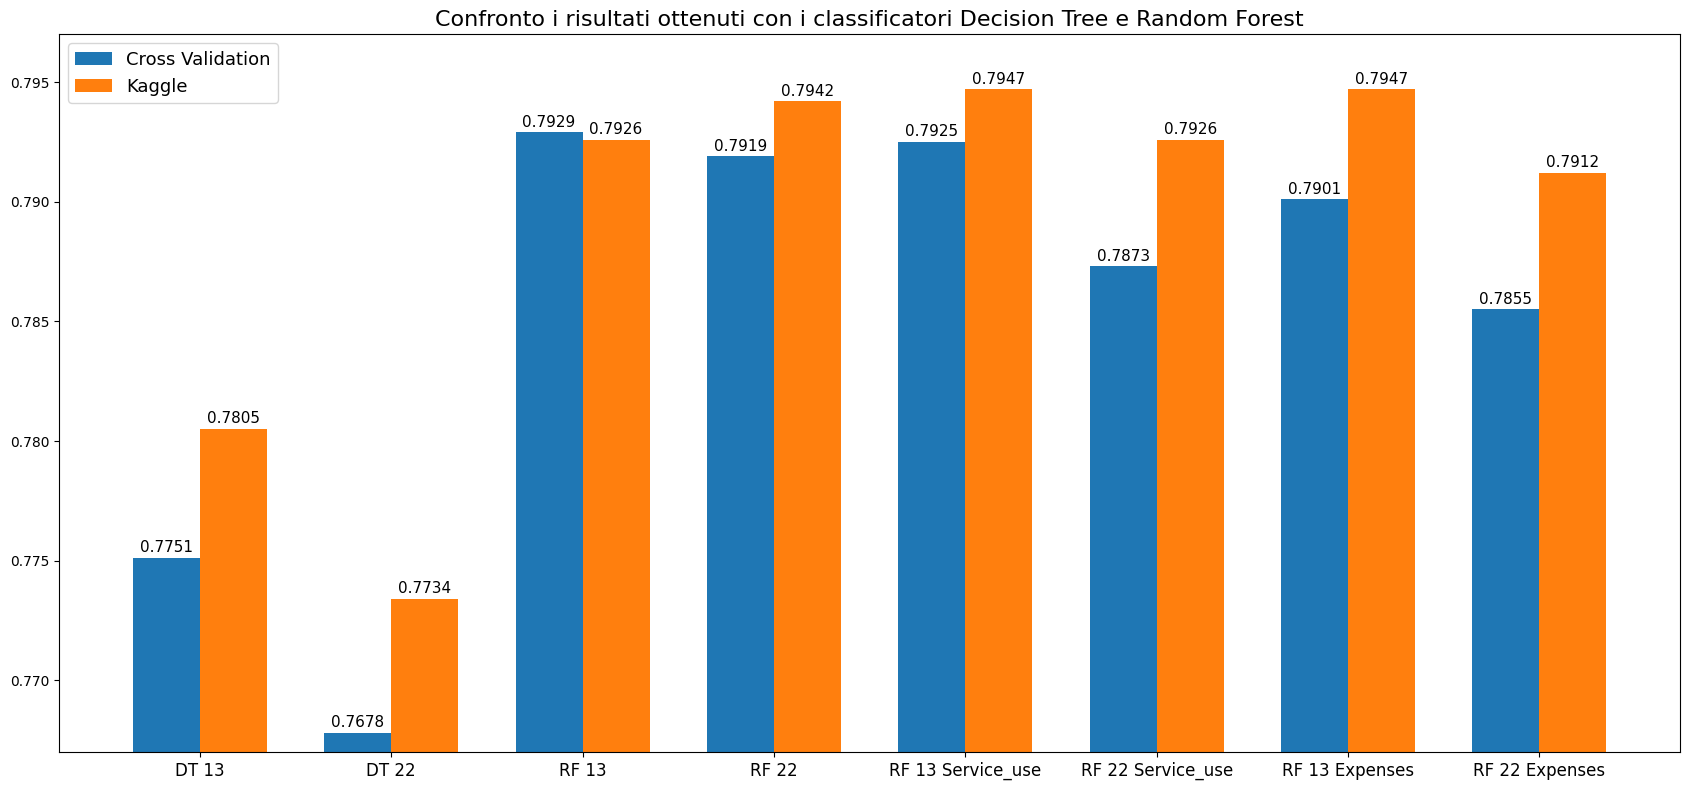

In [ ]:
classifers = ('DT 13', 'DT 22', 'RF 13', 'RF 22', 'RF 13 Service_use',
              'RF 22 Service_use', 'RF 13 Expenses', 'RF 22 Expenses')
scores = {
    'Cross Validation': (0.7751, 0.7678, 0.7929, 0.7919, 0.7925, 0.7873, 0.7901, 0.7855),
    'Kaggle': (0.7805, 0.7734, 0.7926, 0.7942, 0.7947, 0.7926, 0.7947, 0.7912)
}

x = np.arange(len(classifers))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(17,8))

for attribute, score in scores.items():
  offset = width * multiplier
  rects = ax.bar(x + offset, score, width, label=attribute)
  ax.bar_label(rects, padding=2, fontsize=11)
  multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Confronto i risultati ottenuti con i classificatori Decision Tree e Random Forest', fontsize=16)
ax.set_ylim(0.7670, 0.7970)
ax.set_xticks(x+ width/2, classifers, fontsize=12)
ax.legend(loc='upper left', fontsize=13)

plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "RF_Risultati.png")):
  plt.savefig(IMAGE_PATH + "RF_Risultati.png", format="png")
plt.show()